# **Data Loading and Initial Exploration**



In [ ]:
# Importing the necessary Python libraries and modules

import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# Load audio data
dataset = pd.read_csv('audio_features.csv')

In [ ]:
dataset

,employee_id,speech_sentiment_score,speech_energy_level,speech_clarity_score,tone_consistency_score,speaking_speed,pause_frequency,pitch_variation,volume_stability_score,performance_rating
0,1001,-0.73,6,9,2,147,5,1,2,Low
1,1002,-0.61,8,8,2,112,5,7,6,Low
2,1003,-0.12,5,9,2,115,2,5,6,Low
3,1004,-0.46,9,6,8,135,2,5,2,Medium
4,1005,-0.08,8,8,2,98,2,4,9,Low
...,...,...,...,...,...,...,...,...,...,...
4995,5996,0.66,8,5,5,155,3,9,9,High
4996,5997,1.00,5,5,6,121,8,5,1,Low
4997,5998,0.94,9,7,2,152,9,8,2,High
4998,5999,-0.69,5,5,2,116,1,5,3,Medium


In [ ]:
print(f"Dataset Shape {dataset.shape}")

Dataset Shape (5000, 10)


In [ ]:
print("\nColumn Names: ")
print(dataset.columns.tolist())


Column Names: 
['employee_id', 'speech_sentiment_score', 'speech_energy_level', 'speech_clarity_score', 'tone_consistency_score', 'speaking_speed', 'pause_frequency', 'pitch_variation', 'volume_stability_score', 'performance_rating']


In [ ]:
# Display the data types
print("\nData Types")
print(dataset.dtypes)


Data Types
employee_id                 int64
speech_sentiment_score    float64
speech_energy_level         int64
speech_clarity_score        int64
tone_consistency_score      int64
speaking_speed              int64
pause_frequency             int64
pitch_variation             int64
volume_stability_score      int64
performance_rating         object
dtype: object


In [ ]:
# Descriptive statistics of the dataset
dataset.describe()

,employee_id,speech_sentiment_score,speech_energy_level,speech_clarity_score,tone_consistency_score,speaking_speed,pause_frequency,pitch_variation,volume_stability_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000
mean,3500.500000,0.005138,6.039200,7.040400,4.97700,119.581400,4.42340,4.967600,4.951200
std,1443.520003,0.583321,2.004711,1.414626,2.57616,23.288681,2.85926,2.598904,2.586534
min,1001.000000,-1.000000,3.000000,5.000000,1.00000,80.000000,0.00000,1.000000,1.000000
25%,2250.750000,-0.510000,4.000000,6.000000,3.00000,99.000000,2.00000,3.000000,3.000000
50%,3500.500000,0.010000,6.000000,7.000000,5.00000,119.000000,4.00000,5.000000,5.000000
75%,4750.250000,0.530000,8.000000,8.000000,7.00000,140.000000,7.00000,7.000000,7.000000
max,6000.000000,1.000000,9.000000,9.000000,9.00000,159.000000,9.00000,9.000000,9.000000


In [ ]:
# Display Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             5000 non-null   int64  
 1   speech_sentiment_score  5000 non-null   float64
 2   speech_energy_level     5000 non-null   int64  
 3   speech_clarity_score    5000 non-null   int64  
 4   tone_consistency_score  5000 non-null   int64  
 5   speaking_speed          5000 non-null   int64  
 6   pause_frequency         5000 non-null   int64  
 7   pitch_variation         5000 non-null   int64  
 8   volume_stability_score  5000 non-null   int64  
 9   performance_rating      5000 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 390.8+ KB


In [ ]:
# Display missing value
dataset.isnull().sum()

,0
employee_id,0
speech_sentiment_score,0
speech_energy_level,0
speech_clarity_score,0
tone_consistency_score,0
speaking_speed,0
pause_frequency,0
pitch_variation,0
volume_stability_score,0
performance_rating,0


In [ ]:
# Display Duplicate Rows
dataset.duplicated().sum()

np.int64(0)

In [ ]:
# Employee_ID Verification
missing_values = print(f"Missing Values in Employee ID: {dataset["employee_id"].isnull().sum()}")
number_of_rows  = print(f"Number of Rows in Employee ID: {dataset["employee_id"].count()}")
distinct_values = print(f"Distinct Values in Employee ID: {dataset["employee_id"].is_unique}")

Missing Values in Employee ID: 0
Number of Rows in Employee ID: 5000
Distinct Values in Employee ID: True


In [ ]:
# Document class balance
print(dataset['performance_rating'].value_counts())

performance_rating
High      1754
Low       1653
Medium    1593
Name: count, dtype: int64


In [ ]:
# Select numeric features excluding employee_id
num_features = dataset.select_dtypes(include=[np.number]).columns.drop('employee_id')

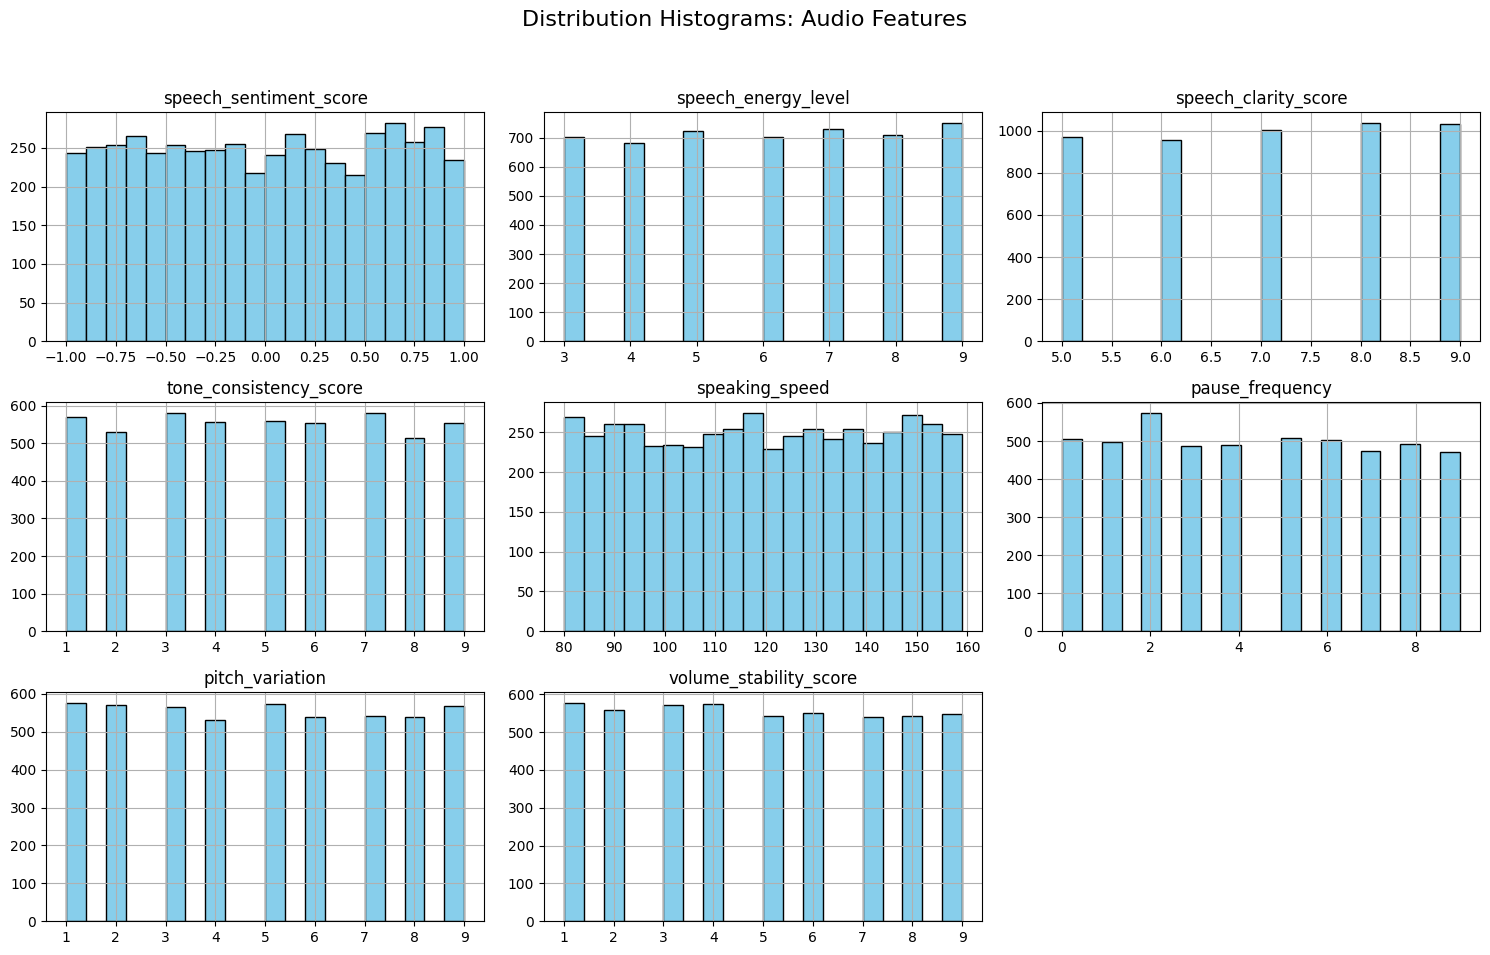

<Figure size 640x480 with 0 Axes>

In [ ]:
# Figure 1: Distribution Histograms
dataset[num_features].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution Histograms: Audio Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.savefig('Distribution_Histograms-Audio_Features.png')

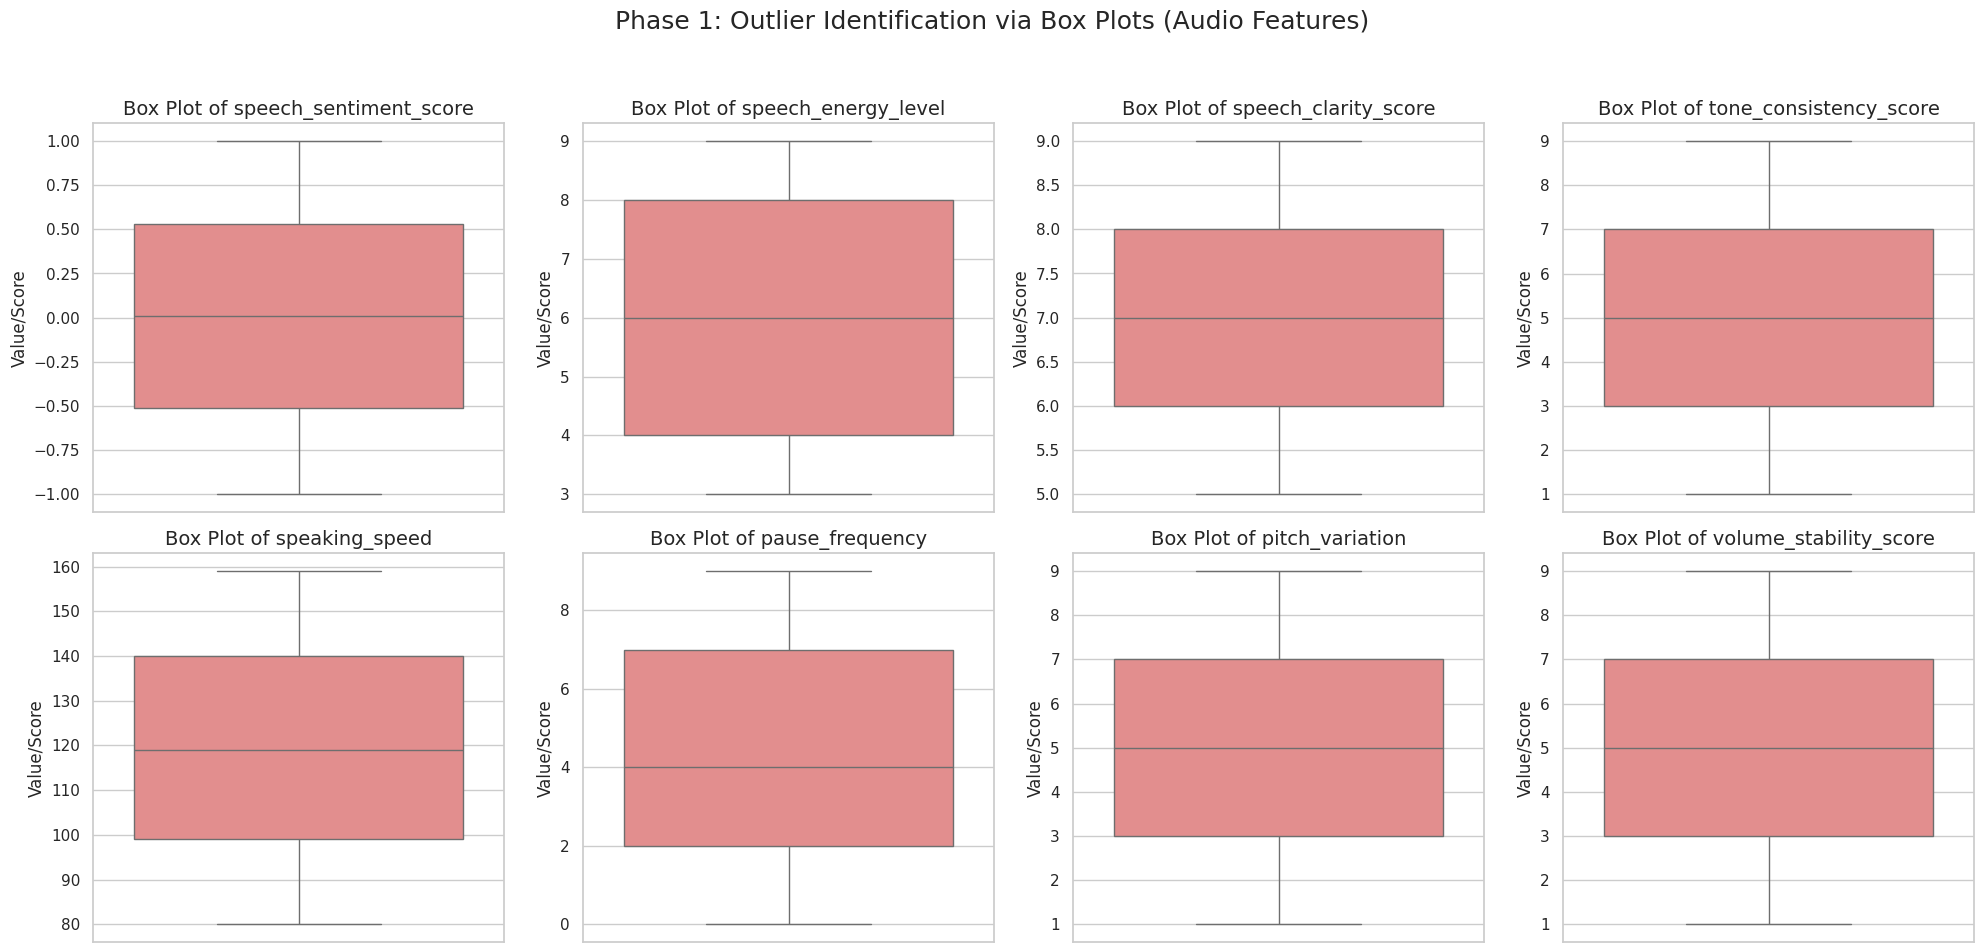

--- Audio Features IQR Outlier Report ---
speech_sentiment_score: 0 outliers found
speech_energy_level: 0 outliers found
speech_clarity_score: 0 outliers found
tone_consistency_score: 0 outliers found
speaking_speed: 0 outliers found
pause_frequency: 0 outliers found
pitch_variation: 0 outliers found
volume_stability_score: 0 outliers found


<Figure size 640x480 with 0 Axes>

In [ ]:
# These features are used for the SVC model.
numerical_cols = [
    'speech_sentiment_score', 'speech_energy_level', 'speech_clarity_score',
    'tone_consistency_score', 'speaking_speed', 'pause_frequency',
    'pitch_variation', 'volume_stability_score'
]

# Visualization Setup
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    # Rationale: flierprops highlights outliers with a red 'x' for better visibility.
    sns.boxplot(y=dataset[col], color='lightcoral',
                flierprops={"marker": "x", "markersize": 10, "markerfacecolor": "red"})
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel('Value/Score')

plt.suptitle('Phase 1: Outlier Identification via Box Plots (Audio Features)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Programmatic Outlier Detection (IQR Method)
print("--- Audio Features IQR Outlier Report ---")
for col in numerical_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify rows that fall outside the bounds
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    # Corrected f-string quoting to avoid SyntaxError in Colab
    print(f"{col}: {len(outliers)} outliers found")

    plt.savefig('Outlier_Identification_via_Box_Plots.png')

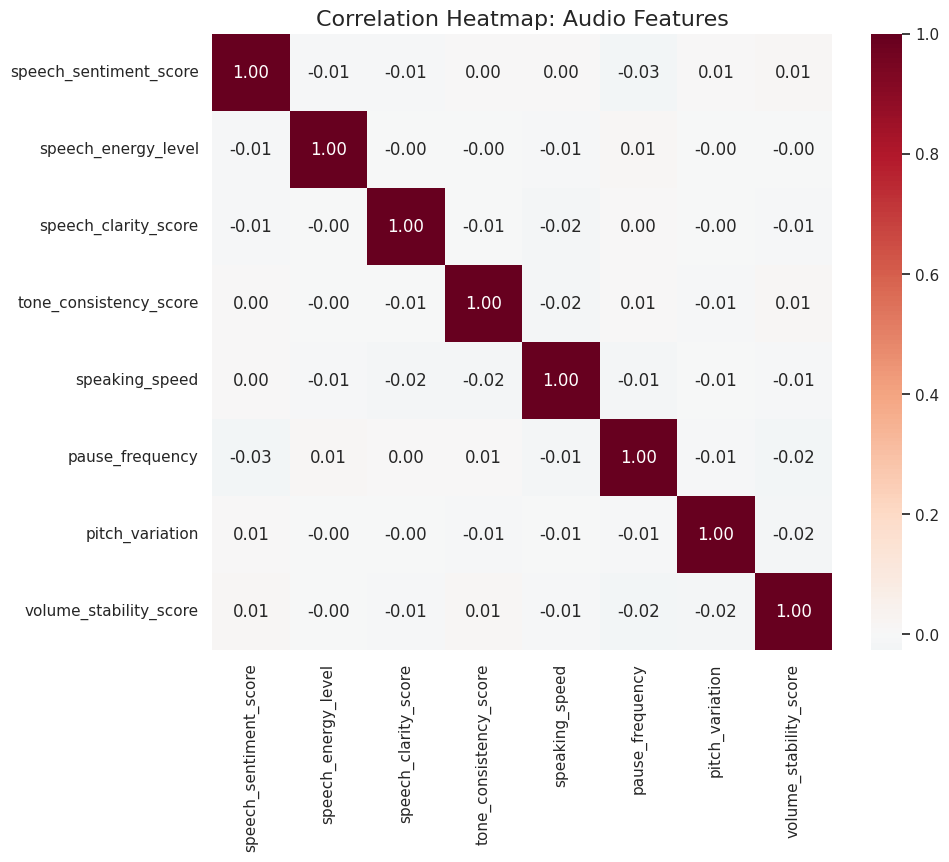

<Figure size 640x480 with 0 Axes>

In [ ]:
# Figure 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[num_features].corr(), annot=True, cmap='RdBu_r', fmt=".2f", center=0)
plt.title("Correlation Heatmap: Audio Features", fontsize=16)
plt.show()
plt.savefig('Correlation_Heatmap_Audio Features.png')

/tmp/ipython-input-479/759501992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='performance_rating',


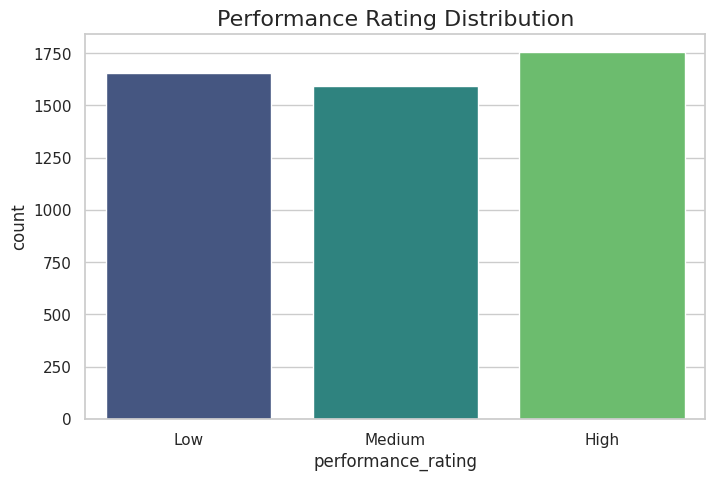

<Figure size 640x480 with 0 Axes>

In [ ]:
# Figure 4: Performance Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='performance_rating',
              order=['Low', 'Medium', 'High'], palette='viridis')
plt.title("Performance Rating Distribution", fontsize=16)
plt.show()
plt.savefig('Performance_Rating_Distribution.png')

# **Observations**


1.   The dataset looks perfectly clean with 0 missing values and 0 duplicate rows across all 5000 records.
2.   The classes are well distributed across the dataset.


1.   There is significant variance in the feature scales.
2.   Most features like speech_clarity_score, pitch_variation etc show relatively balanced distributions across their ranges (mostly integers from 1–9 or 5–9).





# **Data Preprocessing**

In [ ]:
# Feature Engineering. Create the required ratio feature: clarity_to_speed_ratio

# Formula: (speech_clarity_score / speaking_speed) * 100
dataset['clarity_to_speech_ratio'] = (dataset['speech_clarity_score'] / dataset['speaking_speed']) * 100

In [ ]:
dataset.head()

,employee_id,speech_sentiment_score,speech_energy_level,speech_clarity_score,tone_consistency_score,speaking_speed,pause_frequency,pitch_variation,volume_stability_score,performance_rating,clarity_to_speech_ratio
0,1001,-0.73,6,9,2,147,5,1,2,Low,6.122449
1,1002,-0.61,8,8,2,112,5,7,6,Low,7.142857
2,1003,-0.12,5,9,2,115,2,5,6,Low,7.826087
3,1004,-0.46,9,6,8,135,2,5,2,Medium,4.444444
4,1005,-0.08,8,8,2,98,2,4,9,Low,8.163265


In [ ]:
# Categorical Encoding. Map the performance_rating to numerical labels as required

rating_map = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply to your dataframe
dataset['performance_rating_encoded'] = dataset['performance_rating'].map(rating_map)

In [ ]:
dataset.head()

,employee_id,speech_sentiment_score,speech_energy_level,speech_clarity_score,tone_consistency_score,speaking_speed,pause_frequency,pitch_variation,volume_stability_score,performance_rating,clarity_to_speech_ratio,performance_rating_encoded
0,1001,-0.73,6,9,2,147,5,1,2,Low,6.122449,0
1,1002,-0.61,8,8,2,112,5,7,6,Low,7.142857,0
2,1003,-0.12,5,9,2,115,2,5,6,Low,7.826087,0
3,1004,-0.46,9,6,8,135,2,5,2,Medium,4.444444,1
4,1005,-0.08,8,8,2,98,2,4,9,Low,8.163265,0


In [ ]:
# Get the current list of columns
columns = dataset.columns.tolist()
print(columns)

['employee_id', 'speech_sentiment_score', 'speech_energy_level', 'speech_clarity_score', 'tone_consistency_score', 'speaking_speed', 'pause_frequency', 'pitch_variation', 'volume_stability_score', 'performance_rating', 'clarity_to_speech_ratio', 'performance_rating_encoded']


In [ ]:
# Find the index of 'quality_per_task' and 'performance_rating'
idx_quality_per_task = columns.index('clarity_to_speech_ratio')
idx_performance_rating = columns.index('performance_rating')

# Swap the column names in the list
columns[idx_quality_per_task], columns[idx_performance_rating] = columns[idx_performance_rating], columns[idx_quality_per_task]

# Reindex the DataFrame with the new column order
dataset = dataset[columns]

print("Columns swapped successfully. Displaying updated DataFrame head:")
display(dataset.head(10))

Columns swapped successfully. Displaying updated DataFrame head:


,employee_id,speech_sentiment_score,speech_energy_level,speech_clarity_score,tone_consistency_score,speaking_speed,pause_frequency,pitch_variation,volume_stability_score,clarity_to_speech_ratio,performance_rating,performance_rating_encoded
0,1001,-0.73,6,9,2,147,5,1,2,6.122449,Low,0
1,1002,-0.61,8,8,2,112,5,7,6,7.142857,Low,0
2,1003,-0.12,5,9,2,115,2,5,6,7.826087,Low,0
3,1004,-0.46,9,6,8,135,2,5,2,4.444444,Medium,1
4,1005,-0.08,8,8,2,98,2,4,9,8.163265,Low,0
5,1006,-0.97,6,6,6,129,7,4,1,4.651163,Low,0
6,1007,0.89,7,6,1,100,2,6,3,6.000000,Medium,1
7,1008,0.34,4,5,3,121,3,9,4,4.132231,Low,0
8,1009,-0.11,4,5,5,147,0,7,9,3.401361,Medium,1
9,1010,0.10,7,6,4,140,7,8,8,4.285714,High,2


**Reasons for Feature Engineering**




1.   This ratio normalizes communication clarity against speaking speed.
High values → clear communication even when speaking relatively quickly (effective, confident communicators)
Low values → either unclear speech, or very slow speech that reduces perceived clarity/efficiency



1.   In professional settings (meetings, presentations, client calls), clear and efficient communication is highly valued. This feature captures that balance better than either variable alone.
2.   Multiplying by 100 scales the ratio to a more readable range (typically 3–12), making interpretation easier







# **Train Test Split**

In [ ]:
X = dataset.iloc[:, 1 :-2].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[-0.73      ,  6.        ,  9.        , ...,  1.        ,
         2.        ,  6.12244898],
       [-0.61      ,  8.        ,  8.        , ...,  7.        ,
         6.        ,  7.14285714],
       [-0.12      ,  5.        ,  9.        , ...,  5.        ,
         6.        ,  7.82608696],
       ...,
       [ 0.94      ,  9.        ,  7.        , ...,  8.        ,
         2.        ,  4.60526316],
       [-0.69      ,  5.        ,  5.        , ...,  5.        ,
         3.        ,  4.31034483],
       [ 0.31      ,  3.        ,  8.        , ...,  7.        ,
         3.        ,  9.75609756]])

In [ ]:
y

array([0, 0, 0, ..., 2, 1, 0])

In [ ]:
# Rationale: 80/20 split with random_state=42 ensures synchronization across all files.
# stratify=y maintains the balanced distribution (1/3 each) in both sets [1, 2].
X_train_audio, X_test_audio, y_train_audio, y_test_audio = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [ ]:
# Verify the Split and Stratification
print(f"Total Records: {len(dataset)}")
print(f"Training Set: {X_train_audio.shape} employees")
print(f"Test Set: {X_test_audio.shape} employees")

Total Records: 5000
Training Set: (4000, 9) employees
Test Set: (1000, 9) employees


In [ ]:
# Calculate the percentage of class distribution in the target variable (performance_rating).
train_series = pd.Series(y_train_audio)
test_series = pd.Series(y_test_audio)
original_dist = dataset['performance_rating_encoded'].value_counts(normalize=True) *100
train_dist = train_series.value_counts(normalize = True) * 100
test_dist = test_series.value_counts(normalize = True) * 100
print("--- Original Distribution ---")
print(original_dist)
print("--- Training Set Distribution ---")
print(train_dist)
print("--- Testing Set Distribution ---")
print(test_dist)

--- Original Distribution ---
performance_rating_encoded
2    35.08
0    33.06
1    31.86
Name: proportion, dtype: float64
--- Training Set Distribution ---
2    35.075
0    33.050
1    31.875
Name: proportion, dtype: float64
--- Testing Set Distribution ---
2    35.1
0    33.1
1    31.8
Name: proportion, dtype: float64


# **Model Building**

In [ ]:
# 1. Feature Scaling
# Rationale: SVC is sensitive to feature scales. We fit the scaler ONLY on X_train_audio to prevent data leakage.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_audio)
X_test_scaled = scaler.transform(X_test_audio)


In [ ]:
# 2. Build and Train the Support Vector Classifier
# Rationale: RBF kernel is used for complex decision boundaries.

audio_model = SVC(kernel='rbf', random_state=42, probability=True)

print("Training Model 3: Communication Style Predictor...")
audio_model.fit(X_train_scaled, y_train_audio)

Training Model 3: Communication Style Predictor...


SVC(probability=True, random_state=42)

In [ ]:
# 3. Generate Predictions
# Needed for evaluation metrics in Phase 1.5

y_train_pred = audio_model.predict(X_train_scaled)
y_test_pred = audio_model.predict(X_test_scaled)

print("Phase 1.4 Complete: Model trained and predictions generated.")

Phase 1.4 Complete: Model trained and predictions generated.


# **Model Evaluation**

In [ ]:
# 1. Calculate Core Metrics (Requirement 1.5)
train_accuracy = accuracy_score(y_train_audio, y_train_pred)
test_accuracy = accuracy_score(y_test_audio, y_test_pred)
macro_f1 = f1_score(y_test_audio, y_test_pred, average='macro')

print(f"--- Model 3: Audio Features Performance ---")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")
print(f"Macro F1-Score:    {macro_f1:.4f}")

--- Model 3: Audio Features Performance ---
Training Accuracy: 0.4740
Test Accuracy:     0.3280
Macro F1-Score:    0.3153


In [ ]:
# 2. Detailed Classification Report (Requirement 1.5)
# Labels correspond to: 0=Low, 1=Medium, 2=High
target_names = ['Low', 'Medium', 'High']
print("\nClassification Report (Test Set):")
print(classification_report(y_test_audio, y_test_pred, target_names=target_names))


Classification Report (Test Set):
              precision    recall  f1-score   support

         Low       0.31      0.31      0.31       331
      Medium       0.34      0.19      0.24       318
        High       0.33      0.47      0.39       351

    accuracy                           0.33      1000
   macro avg       0.33      0.32      0.32      1000
weighted avg       0.33      0.33      0.32      1000



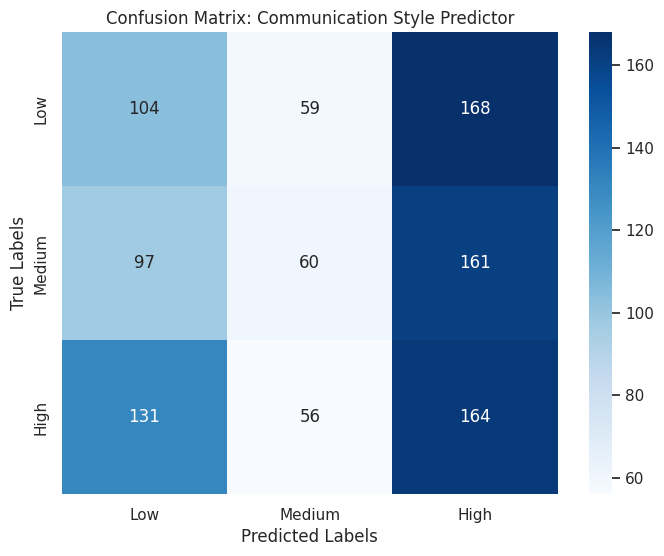

<Figure size 640x480 with 0 Axes>

In [ ]:
# 3. Confusion Matrix Visualization (Requirement 1.5)
cm = confusion_matrix(y_test_audio, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Communication Style Predictor')
plt.show()
plt.savefig('Confusion Matrix: Communication Style Predictor.png')

/tmp/ipython-input-479/295198307.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Accuracy', data=accuracy_df, palette='muted')


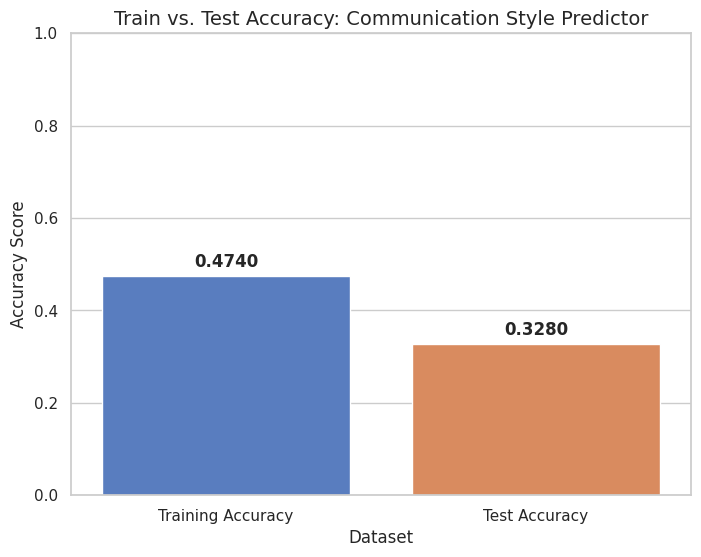

<Figure size 640x480 with 0 Axes>

In [ ]:
# 1. Prepare data for the plot
accuracy_data = {
    'Dataset': ['Training Accuracy', 'Test Accuracy'],
    'Accuracy': [train_accuracy, test_accuracy]
}
accuracy_df = pd.DataFrame(accuracy_data)

# 2. Create the Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Accuracy', data=accuracy_df, palette='muted')

# 3. Add labels and title
plt.ylim(0, 1.0)  # Accuracy ranges from 0 to 1
plt.title('Train vs. Test Accuracy: Communication Style Predictor', fontsize=14)
plt.ylabel('Accuracy Score')

# 4. Add numerical labels on top of the bars for clarity
for i, val in enumerate(accuracy_df['Accuracy']):
    plt.text(i, val + 0.02, f'{val:.4f}', ha='center', fontsize=12, fontweight='bold')

plt.show()
plt.savefig('Train vs Test Accuracy: Communication Style Predictor.png')

In [ ]:
# 1. Define the filename for your audio model
filename = 'audio_model.pkl'

# 2. Save the trained model to a file
# 'wb' means writing in binary mode, which is required for pickle
pickle.dump(audio_model, open(filename, 'wb'))

print(f"Model successfully saved as {filename}")

Model successfully saved as audio_model.pkl
